# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Name : Ezgi Cuğ</h2>

# Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read csv
df_raw = pd.read_csv("diamonds.csv")
df_raw

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [7]:
df_raw.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [9]:
df_raw.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
df_raw.duplicated().sum()

0

# Exploratory Data Analysis

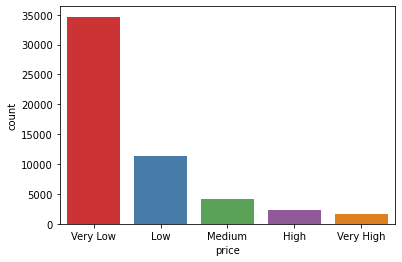

In [17]:
# Our label Distribution (countplot)
ax = sns.countplot(x="price", data=df_raw, palette="Set1")

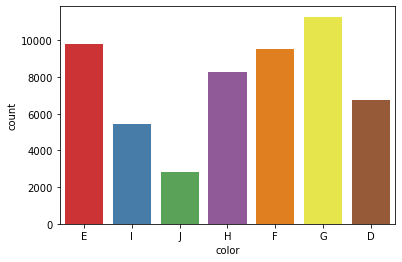

In [16]:
x = sns.countplot(x="color", data=df_raw, palette="Set1")

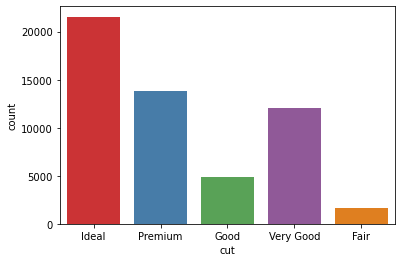

In [15]:
ax = sns.countplot(x="cut", data=df_raw, palette="Set1")

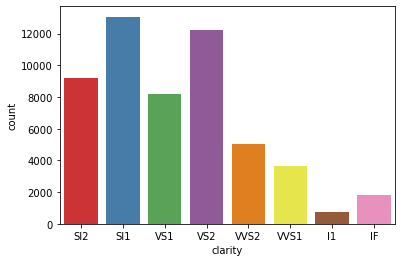

In [19]:
ax = sns.countplot(x="clarity", data=df_raw, palette="Set1")


/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

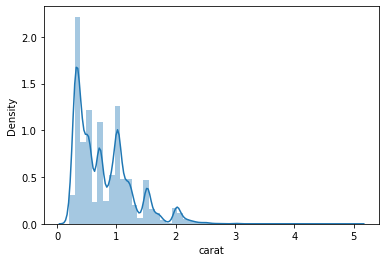

In [21]:
# Example EDA (distplot)
sns.distplot(df_raw.carat)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

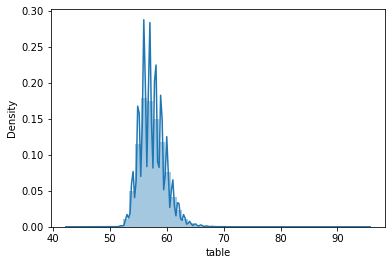

In [22]:
sns.distplot(df_raw.table)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

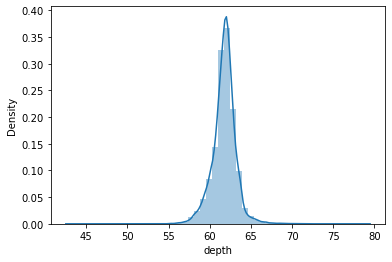

In [23]:
sns.distplot(df_raw.depth)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

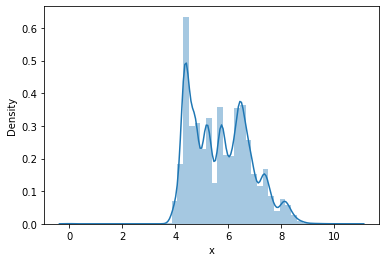

In [24]:
sns.distplot(df_raw.x)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

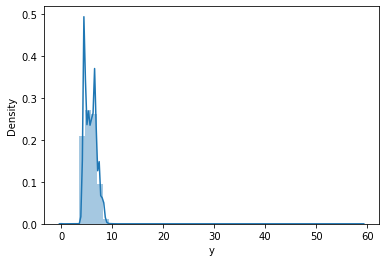

In [25]:
sns.distplot(df_raw.y)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z', ylabel='Density'>

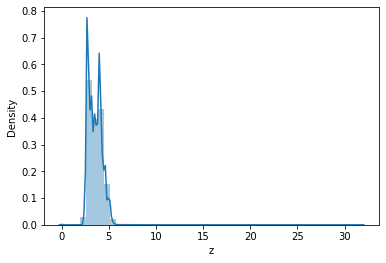

In [26]:
sns.distplot(df_raw.z)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [29]:
df_raw = df_raw.drop(["index"], axis = 1)
df_raw.duplicated().sum() # Check duplicate values 

342

In [31]:
df_raw = df_raw.drop_duplicates().reset_index(drop = True)

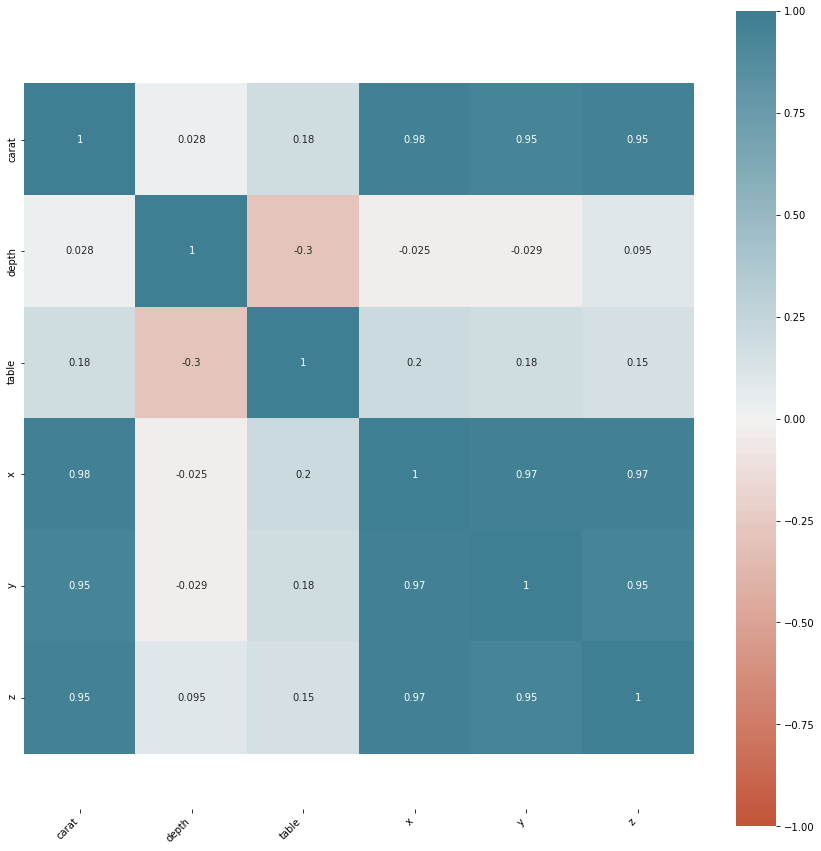

In [32]:
corr = data_raw.corr()

plt.figure(figsize=(15, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_ylim(len(corr)+0.5, -0.5);

In [35]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_raw["cut"] = label_encoder.fit_transform(df_raw["cut"])
df_raw["clarity"] = label_encoder.fit_transform(df_raw["clarity"]) 
df_raw["color"] = label_encoder.fit_transform(df_raw["color"]) 
df_raw["price"] = label_encoder.fit_transform(df_raw["price"]) 
df_raw

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,4
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,4
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,4
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,4
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,4
...,...,...,...,...,...,...,...,...,...,...
53593,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,4
53594,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,4
53595,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,4
53596,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,4


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.